# 외부 데이터 처리

1. 공공데이터나 오픈된 데이터를 파일로 다운 받아서 사용(csv, 엑셀, xml, json...)  
2. 웹 페이지를 읽어서 데이터 분석(그 웹 페이지 구조를 분석해야함)  


In [1]:
#pip install requests
import requests
html = requests.get('https://google.com').text  #웹 요청
html

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="fPvd3MPEsn0udQyiZbWKdA==">(function(){window.google={kEI:\'QlbzYaKuDdD8wAPT9qiADw\',kEXPI:\'0,202450,3,1100083,56873,6059,206,4804,2316,383,246,5,1353,4014,1238,1122515,1197727,674,380090,16114,28684,17572,4858,1362,9290,3023,2821,14765,4020,978,13228,3847,4192,6430,7432,15309,5081,1593,1279,2742,149,1103,840,2197,4100,3514,606,2023,1733,43,521,14670,3227,2845,7,5599,11851,7539,8781,908,2,941,2614,13142,3,346,230,6460,148,13975,4,1528,2304,6463,576,4683,20390,2658,6701,654,32,901,12727,2305,2132,16786,5821,2536,4094,4052,3,3541,1,8710,8097,38,6866,14660,3783,2,14022,1931,4317,1272,743,5853,8703,618,1142,1160,5679,1021,2380,2718,18243,2,6,6717,1055,2125,2443,2578,3681,6723,11905,4790,438,811,11924,5174,940,

In [3]:
#pip install beautifulsoup4
from bs4 import BeautifulSoup

In [4]:
content = BeautifulSoup(html, 'html.parser')  #html소스를 돔 객체화 
title = content.html.head.title    #소스에서 title 태그 추출
print(title.string)  #string:태그의 텍스트 값 <태그>텍스트</태그>

Google


태그 접근 방법  
1. root.html.body.h1 : 태그 한개 검색  
2. root.find(태그[속성]): 태그 1개 검색. 검색이 여러개 되도 처음것 하나만 반환  
3. root.find_all(태그[속성]): 태그 모두 검색  
4. root.select(태그): 태그 모두 검색

In [5]:
#link = content.html.body.a  #처음 a 태그 하나만 추출
links = content.find_all('a')
links

[<a class="gb1" href="https://www.google.co.kr/imghp?hl=ko&amp;tab=wi">이미지</a>,
 <a class="gb1" href="https://maps.google.co.kr/maps?hl=ko&amp;tab=wl">지도</a>,
 <a class="gb1" href="https://play.google.com/?hl=ko&amp;tab=w8">Play</a>,
 <a class="gb1" href="https://www.youtube.com/?gl=KR&amp;tab=w1">YouTube</a>,
 <a class="gb1" href="https://news.google.com/?tab=wn">뉴스</a>,
 <a class="gb1" href="https://mail.google.com/mail/?tab=wm">Gmail</a>,
 <a class="gb1" href="https://drive.google.com/?tab=wo">드라이브</a>,
 <a class="gb1" href="https://www.google.co.kr/intl/ko/about/products?tab=wh" style="text-decoration:none"><u>더보기</u> »</a>,
 <a class="gb4" href="http://www.google.co.kr/history/optout?hl=ko">웹 기록</a>,
 <a class="gb4" href="/preferences?hl=ko">설정</a>,
 <a class="gb4" href="https://accounts.google.com/ServiceLogin?hl=ko&amp;passive=true&amp;continue=https://www.google.com/&amp;ec=GAZAAQ" id="gb_70" target="_top">로그인</a>,
 <a href="/advanced_search?hl=ko&amp;authuser=0">고급검색</a>,
 <a 

In [5]:
for i in links:
    print(i.get_text(), ':', i['href'])#속성값 읽기

이미지 : https://www.google.co.kr/imghp?hl=ko&tab=wi
지도 : https://maps.google.co.kr/maps?hl=ko&tab=wl
Play : https://play.google.com/?hl=ko&tab=w8
YouTube : https://www.youtube.com/?gl=KR&tab=w1
뉴스 : https://news.google.com/?tab=wn
Gmail : https://mail.google.com/mail/?tab=wm
드라이브 : https://drive.google.com/?tab=wo
더보기 » : https://www.google.co.kr/intl/ko/about/products?tab=wh
웹 기록 : http://www.google.co.kr/history/optout?hl=ko
설정 : /preferences?hl=ko
로그인 : https://accounts.google.com/ServiceLogin?hl=ko&passive=true&continue=https://www.google.com/&ec=GAZAAQ
고급검색 : /advanced_search?hl=ko&authuser=0
광고 프로그램 : /intl/ko/ads/
비즈니스 솔루션 : http://www.google.co.kr/intl/ko/services/
Google 정보 : /intl/ko/about.html
Google.co.kr : https://www.google.com/setprefdomain?prefdom=KR&prev=https://www.google.co.kr/&sig=K_2QTXjmi4ROkFkO2kPbc0I025oos%3D
개인정보처리방침 : /intl/ko/policies/privacy/
약관 : /intl/ko/policies/terms/


In [6]:
html = '<html>'
html += '<body>'
html += '<p class=a>aaa</p>'
html += '<p class=b>bbb</p>'
html += '<p class=a>ccc</p>'
html += '<p class=a id=xxx>ddd</p>'
html += '</body>'
html += '</html>'

root = BeautifulSoup(html, 'html.parser') 
p1 = root.find_all('p')
print('p1:', p1)
p2 = root.find_all('p', {'class':'a'})
print('p2:', p2)
p3 = root.find_all('p', {'class':'b'})
print('p3:', p3)
p4 = root.find('p', {'class':'a', 'id':'xxx'})
print('p4:', p4)
p5 = root.select('p')
print('p5:', p5)
p6 = root.select('p.a')#태그.클래스명 //태그#id명
print('p6:', p6)
p7 = root.select('p.b')
print('p7:', p7)
p8 = root.select('p#xxx')
print('p8:', p8)

p1: [<p class="a">aaa</p>, <p class="b">bbb</p>, <p class="a">ccc</p>, <p class="a" id="xxx">ddd</p>]
p2: [<p class="a">aaa</p>, <p class="a">ccc</p>, <p class="a" id="xxx">ddd</p>]
p3: [<p class="b">bbb</p>]
p4: <p class="a" id="xxx">ddd</p>
p5: [<p class="a">aaa</p>, <p class="b">bbb</p>, <p class="a">ccc</p>, <p class="a" id="xxx">ddd</p>]
p6: [<p class="a">aaa</p>, <p class="a">ccc</p>, <p class="a" id="xxx">ddd</p>]
p7: [<p class="b">bbb</p>]
p8: [<p class="a" id="xxx">ddd</p>]


In [7]:
url = 'https://ent.sbs.co.kr/news/flash.do?plink=GNB&cooper=SBSENTERNEWS'
html = requests.get(url).text  
root = BeautifulSoup(html, 'html.parser') 
divs = root.select('div.w_nwl_text')#기사 div 태그들만 추출
divs

[<div class="w_nwl_text">
 <!-- 기사 타이틀 -->
 <h3 class="nwl_title">'오징어 게임', 미국제작자조합상 후보 지명…비영어권 최초</h3>
 <!-- 기사 리드문 -->
 <div class="nwl_text">넷플릭스 드라마 '오징어 게임'이 비영어권 드라마로 처음으로 미국제작자조합상 후보에 올랐다. PGA가 27일 홈페이지를 통해 발표한 제33회 시상식 후보 명단에 따르면 '오징어 게임'은 TV 드라마 부문 최우수상에 해당하는 노먼 펠턴상 후보에 지명됐다.</div>
 <!-- 기사 정보 (기자 및 날짜시간) -->
 <div class="w_nwl_info">
 <em class="nwl_reporter">김지혜 기자</em>
 <div class="nwl_subtext">2022.01.28 12:10</div>
 </div>
 </div>,
 <div class="w_nwl_text">
 <!-- 기사 타이틀 -->
 <h3 class="nwl_title">브레이브걸스 유나, 코로나19 확진…유정·은지는 음성</h3>
 <!-- 기사 리드문 -->
 <div class="nwl_text">그룹 브레이브걸스 멤버 유나가 코로나19에 확진됐다. 28일 소속사 브레이브 엔터테인먼트는 공식 팬카페를 통해 "브레이브걸스의 멤버 유나가 오늘 코로나19 확진 판정을 받았다"고 알렸다.</div>
 <!-- 기사 정보 (기자 및 날짜시간) -->
 <div class="w_nwl_info">
 <em class="nwl_reporter">강선애 기자</em>
 <div class="nwl_subtext">2022.01.28 12:00</div>
 </div>
 </div>,
 <div class="w_nwl_text">
 <!-- 기사 타이틀 -->
 <h3 class="nwl_title">"3차 접종 후 시력 나빠져"…강석우, 라디오 떠나며 남긴 말은</h3>
 <!-- 기사 리드문 -->
 <div class="nwl

In [8]:
for i in divs:
    title = i.find('h3').text
    print('title:', title)
    #select는 여러개검색하는 함수이므로 반환타입이 []리스트다
    text = i.select('div.nwl_text')[0].text  
    print('text:', text)
    writer = i.select('em.nwl_reporter')[0].text
    print('writer:', writer)
    time = i.select('div.nwl_subtext')[0].text
    print('time:', time)
    print('====================')

title: '오징어 게임', 미국제작자조합상 후보 지명…비영어권 최초
text: 넷플릭스 드라마 '오징어 게임'이 비영어권 드라마로 처음으로 미국제작자조합상 후보에 올랐다. PGA가 27일 홈페이지를 통해 발표한 제33회 시상식 후보 명단에 따르면 '오징어 게임'은 TV 드라마 부문 최우수상에 해당하는 노먼 펠턴상 후보에 지명됐다.
writer: 김지혜 기자
time: 2022.01.28 12:10
title: 브레이브걸스 유나, 코로나19 확진…유정·은지는 음성
text: 그룹 브레이브걸스 멤버 유나가 코로나19에 확진됐다. 28일 소속사 브레이브 엔터테인먼트는 공식 팬카페를 통해 "브레이브걸스의 멤버 유나가 오늘 코로나19 확진 판정을 받았다"고 알렸다.
writer: 강선애 기자
time: 2022.01.28 12:00
title: "3차 접종 후 시력 나빠져"…강석우, 라디오 떠나며 남긴 말은
text: 배우 강석우가 코로나19 백신 접종 후 시력이 저하됐다며 6년 동안 맡았던 라디오 진행을 중단한다고 밝혔다. 강석우는 27일 CBS 라디오 음악FM '강석우의 아름다운 당신에게'를 진행하며 청취자들을 향해 작별 인사를 했다.
writer: 김지혜 기자
time: 2022.01.28 11:23
title: "4병 밖에 못 마신다?" …'미우새' 정은지, 신동엽에 도전장 내민 '찐 애주가'
text: 그룹 에이핑크 멤버 겸 배우 정은지가 애주가 면모를 드러낸다. 오는 30일 방송될 SBS '미운 우리 새끼'에는 드라마 '술꾼 도시 여자들'에서 리얼한 '술꾼' 연기로 화제를 모은 정은지가 스페셜 MC로 출연한다.
writer: 강선애 기자
time: 2022.01.28 11:22
title: [E포토] 한효주X이광수, '해적 케미 기대하세요'
text: 배우 이광수와 한효주가 지난 26일 오전 서울 양천구 목동 SBS에서 진행된 SBS 파워FM '박하선의 씨네타운' 방송을 위해 사옥으로 들어서며 포즈를 취하고 있다.
writer: 백승철 기자
time: 2

In [9]:
html = requests.get('http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp').text  #웹 요청
#html=html.decode('utf-8')
#지역별 일간 날씨를 출력
root = BeautifulSoup(html, 'html.parser') 
loc = root.find_all('location')
for i in loc:  # i:<location>
    print(i.city.get_text(), '지역 날씨========')
    d = i.find_all('data')
    for j in d: # j:<data>
        print(j.tmef.string , ':', j.wf.string, ' / 최저온도:', j.tmn.string, ' / 최고온도:', j.tmx.string, ' / 습도:',j.rnst.string,'%')
        

서울 지역 날씨========
2022-01-31 00:00 : 맑음  / 최저온도: -6  / 최고온도: 4  / 습도: 0 %
2022-01-31 12:00 : 구름많음  / 최저온도: -6  / 최고온도: 4  / 습도: 40 %
2022-02-01 00:00 : 구름많고 눈  / 최저온도: -2  / 최고온도: 2  / 습도: 80 %
2022-02-01 12:00 : 구름많고 눈  / 최저온도: -2  / 최고온도: 2  / 습도: 60 %
2022-02-02 00:00 : 맑음  / 최저온도: -6  / 최고온도: 1  / 습도: 0 %
2022-02-02 12:00 : 맑음  / 최저온도: -6  / 최고온도: 1  / 습도: 0 %
2022-02-03 00:00 : 맑음  / 최저온도: -7  / 최고온도: 1  / 습도: 0 %
2022-02-03 12:00 : 맑음  / 최저온도: -7  / 최고온도: 1  / 습도: 0 %
2022-02-04 00:00 : 맑음  / 최저온도: -7  / 최고온도: 1  / 습도: 0 %
2022-02-04 12:00 : 맑음  / 최저온도: -7  / 최고온도: 1  / 습도: 0 %
2022-02-05 00:00 : 맑음  / 최저온도: -7  / 최고온도: 1  / 습도: 0 %
2022-02-06 00:00 : 맑음  / 최저온도: -6  / 최고온도: 2  / 습도: 0 %
2022-02-07 00:00 : 맑음  / 최저온도: -5  / 최고온도: 4  / 습도: 10 %
인천 지역 날씨========
2022-01-31 00:00 : 맑음  / 최저온도: -5  / 최고온도: 3  / 습도: 0 %
2022-01-31 12:00 : 구름많음  / 최저온도: -5  / 최고온도: 3  / 습도: 40 %
2022-02-01 00:00 : 구름많고 눈  / 최저온도: -1  / 최고온도: 2  / 습도: 80 %
2022-02-01 12:00 : 구름많고 눈  / 최저온도: -1  / 최고온도: 2

2022-02-01 00:00 : 흐리고 비/눈  / 최저온도: -1  / 최고온도: 5  / 습도: 60 %
2022-02-01 12:00 : 구름많음  / 최저온도: -1  / 최고온도: 5  / 습도: 30 %
2022-02-02 00:00 : 구름많음  / 최저온도: -2  / 최고온도: 5  / 습도: 30 %
2022-02-02 12:00 : 구름많음  / 최저온도: -2  / 최고온도: 5  / 습도: 30 %
2022-02-03 00:00 : 구름많음  / 최저온도: -3  / 최고온도: 5  / 습도: 30 %
2022-02-03 12:00 : 구름많음  / 최저온도: -3  / 최고온도: 5  / 습도: 30 %
2022-02-04 00:00 : 구름많음  / 최저온도: -4  / 최고온도: 4  / 습도: 30 %
2022-02-04 12:00 : 구름많음  / 최저온도: -4  / 최고온도: 4  / 습도: 20 %
2022-02-05 00:00 : 구름많음  / 최저온도: -3  / 최고온도: 4  / 습도: 30 %
2022-02-06 00:00 : 구름많음  / 최저온도: -3  / 최고온도: 5  / 습도: 30 %
2022-02-07 00:00 : 구름많음  / 최저온도: -2  / 최고온도: 8  / 습도: 30 %
목포 지역 날씨========
2022-01-31 00:00 : 맑음  / 최저온도: -2  / 최고온도: 5  / 습도: 0 %
2022-01-31 12:00 : 구름많음  / 최저온도: -2  / 최고온도: 5  / 습도: 20 %
2022-02-01 00:00 : 흐리고 비/눈  / 최저온도: 1  / 최고온도: 5  / 습도: 60 %
2022-02-01 12:00 : 구름많음  / 최저온도: 1  / 최고온도: 5  / 습도: 30 %
2022-02-02 00:00 : 구름많음  / 최저온도: -1  / 최고온도: 4  / 습도: 30 %
2022-02-02 12:00 : 구름많음  / 최저온도: -1  /

2022-01-31 12:00 : 구름많음  / 최저온도: -10  / 최고온도: 6  / 습도: 20 %
2022-02-01 00:00 : 흐리고 눈  / 최저온도: -3  / 최고온도: 3  / 습도: 70 %
2022-02-01 12:00 : 흐리고 눈  / 최저온도: -3  / 최고온도: 3  / 습도: 60 %
2022-02-02 00:00 : 구름많음  / 최저온도: -7  / 최고온도: 3  / 습도: 30 %
2022-02-02 12:00 : 구름많음  / 최저온도: -7  / 최고온도: 3  / 습도: 20 %
2022-02-03 00:00 : 구름많음  / 최저온도: -7  / 최고온도: 3  / 습도: 30 %
2022-02-03 12:00 : 구름많음  / 최저온도: -7  / 최고온도: 3  / 습도: 30 %
2022-02-04 00:00 : 구름많음  / 최저온도: -9  / 최고온도: 2  / 습도: 30 %
2022-02-04 12:00 : 맑음  / 최저온도: -9  / 최고온도: 2  / 습도: 0 %
2022-02-05 00:00 : 구름많음  / 최저온도: -9  / 최고온도: 2  / 습도: 20 %
2022-02-06 00:00 : 구름많음  / 최저온도: -8  / 최고온도: 4  / 습도: 30 %
2022-02-07 00:00 : 구름많음  / 최저온도: -6  / 최고온도: 6  / 습도: 30 %
부산 지역 날씨========
2022-01-31 00:00 : 맑음  / 최저온도: -1  / 최고온도: 10  / 습도: 0 %
2022-01-31 12:00 : 맑음  / 최저온도: -1  / 최고온도: 10  / 습도: 0 %
2022-02-01 00:00 : 구름많음  / 최저온도: 1  / 최고온도: 8  / 습도: 30 %
2022-02-01 12:00 : 구름많음  / 최저온도: 1  / 최고온도: 8  / 습도: 30 %
2022-02-02 00:00 : 맑음  / 최저온도: -1  / 최고온도: 8 

2022-02-01 12:00 : 구름많음  / 최저온도: 1  / 최고온도: 3  / 습도: 30 %
2022-02-02 00:00 : 맑음  / 최저온도: 0  / 최고온도: 4  / 습도: 0 %
2022-02-02 12:00 : 맑음  / 최저온도: 0  / 최고온도: 4  / 습도: 0 %
2022-02-03 00:00 : 구름많음  / 최저온도: -1  / 최고온도: 2  / 습도: 20 %
2022-02-03 12:00 : 구름많음  / 최저온도: -1  / 최고온도: 2  / 습도: 20 %
2022-02-04 00:00 : 구름많음  / 최저온도: -1  / 최고온도: 3  / 습도: 20 %
2022-02-04 12:00 : 구름많음  / 최저온도: -1  / 최고온도: 3  / 습도: 20 %
2022-02-05 00:00 : 맑음  / 최저온도: 0  / 최고온도: 3  / 습도: 0 %
2022-02-06 00:00 : 맑음  / 최저온도: 0  / 최고온도: 4  / 습도: 0 %
2022-02-07 00:00 : 구름많음  / 최저온도: 1  / 최고온도: 4  / 습도: 30 %
제주 지역 날씨========
2022-01-31 00:00 : 맑음  / 최저온도: 2  / 최고온도: 8  / 습도: 0 %
2022-01-31 12:00 : 구름많음  / 최저온도: 2  / 최고온도: 8  / 습도: 20 %
2022-02-01 00:00 : 흐림  / 최저온도: 5  / 최고온도: 8  / 습도: 40 %
2022-02-01 12:00 : 구름많음  / 최저온도: 5  / 최고온도: 8  / 습도: 30 %
2022-02-02 00:00 : 구름많음  / 최저온도: 3  / 최고온도: 7  / 습도: 30 %
2022-02-02 12:00 : 구름많음  / 최저온도: 3  / 최고온도: 7  / 습도: 30 %
2022-02-03 00:00 : 구름많음  / 최저온도: 3  / 최고온도: 6  / 습도: 30 %
2022-02-03

In [15]:
import json
j = '[{"id":"aaa", "pwd":"111"},{"id":"bbb", "pwd":"222"}]'#json 데이터

items = json.loads(j)#제이슨 파싱하여 객체화. items는 배열
for item in items:
    print(item['id'], ':', item['pwd'])

aaa : 111
bbb : 222


In [24]:
j = '['
j += '{"info":{"id":"aaa", "pwd":"111"}, "colors":["red", "blue", "yellow"]},'
j += '{"info":{"id":"bbb", "pwd":"222"}, "colors":["red2", "blue2", "yellow2"]}'
j += ']'

items = json.loads(j)
for item in items:
    info = item['info']
    arr = item['colors']
    print(info['id'], ' / ', info['pwd'])
    for a in arr:
        print(a, end=', ')
    print()

aaa  /  111
red, blue, yellow, 
bbb  /  222
red2, blue2, yellow2, 


In [37]:
html = requests.get('https://api.github.com/repositories').text
items = json.loads(html)#제이슨 파싱하여 객체화. items는 배열
for item in items:
    print('id:', item['id'], ' / ', 'name:', item['name'], ' / ', 'login:', item['owner']['login'])

id: 1  /  name: grit  /  login: mojombo
id: 26  /  name: merb-core  /  login: wycats
id: 27  /  name: rubinius  /  login: rubinius
id: 28  /  name: god  /  login: mojombo
id: 29  /  name: jsawesome  /  login: vanpelt
id: 31  /  name: jspec  /  login: wycats
id: 35  /  name: exception_logger  /  login: defunkt
id: 36  /  name: ambition  /  login: defunkt
id: 42  /  name: restful-authentication  /  login: technoweenie
id: 43  /  name: attachment_fu  /  login: technoweenie
id: 48  /  name: microsis  /  login: caged
id: 52  /  name: s3  /  login: anotherjesse
id: 53  /  name: taboo  /  login: anotherjesse
id: 54  /  name: foxtracs  /  login: anotherjesse
id: 56  /  name: fotomatic  /  login: anotherjesse
id: 61  /  name: glowstick  /  login: mojombo
id: 63  /  name: starling  /  login: defunkt
id: 65  /  name: merb-more  /  login: wycats
id: 68  /  name: thin  /  login: macournoyer
id: 71  /  name: resource_controller  /  login: jamesgolick
id: 73  /  name: markaby  /  login: jamesgolick
i

In [21]:
import json

f = open('serviceAreaFoods.json', 'r', encoding='utf-8')
json_data = json.load(f)
food1 = json_data['http://data.ex.co.kr:80/link/serviceAreaFoods/B00099']
print('가격:', food1['http://data.ex.co.kr:80/link/def/salePrice'][0]['value'])
print('메뉴명:', food1['http://data.ex.co.kr:80/link/def/batchMenu'][0]['value'])
print('지역명:', food1['http://data.ex.co.kr:80/link/def/serviceAreaName'][0]['value'])
print('고속도로명:', food1['http://data.ex.co.kr:80/link/def/routeName'][0]['value'])
print('방향:', food1['http://data.ex.co.kr:80/link/def/direction'][0]['value'])

가격: ￦7,000
메뉴명: 영양더덕산채비빔밥
지역명: 산청
고속도로명: 통영대전ㆍ중부고속도로
방향: 통영


In [31]:
# json 
for i in json_data: # 음식 하나씩 추출
    food_data = json_data[i]
    for j in food_data: # 음식 정보를 하나씩 추출
        ss = j.split('/')
        title = ss[len(ss)-1]
        data = food_data[j]
        print(title,':',data[0]['value'])
    print('========================')
        

salePrice : ￦7,000
batchMenu : 영양더덕산채비빔밥
serviceAreaName : 산청
routeName : 통영대전ㆍ중부고속도로
rdf-schema#label : 영양더덕산채비빔밥
direction : 통영
salePrice : ￦6,000
batchMenu : 베이컨 김치 볶음밥
serviceAreaName : 공주
routeName : 당진영덕고속도로
rdf-schema#label : 베이컨 김치 볶음밥
direction : 상주
salePrice : ￦7,000
batchMenu : 새송이 돌솥비빔밥
serviceAreaName : 남성주
routeName : 중부내륙고속도로
rdf-schema#label : 새송이 돌솥비빔밥
direction : 양평
salePrice : ￦7,000
batchMenu : 제주고사리육개장
serviceAreaName : 기흥
routeName : 경부고속도로
rdf-schema#label : 제주고사리육개장
direction : 부산
salePrice : ￦7,000
batchMenu : 완주한우불고기철판비빔밥
serviceAreaName : 이서
routeName : 호남고속도로
rdf-schema#label : 완주한우불고기철판비빔밥
direction : 순천
salePrice : ￦7,000
batchMenu : 엄나무닭개장
serviceAreaName : 진안마이산
routeName : 익산포항고속도로
rdf-schema#label : 엄나무닭개장
direction : 익산
salePrice : ￦7,000
batchMenu : 청통한우국밥
serviceAreaName : 청통
routeName : 익산포항고속도로
rdf-schema#label : 청통한우국밥
direction : 익산
salePrice : ￦7,000
batchMenu : 비빔된장찌개
serviceAreaName : 문산
routeName : 남해고속도로
rdf-schema#label : 비빔된장찌개
direction 

rdf-schema#label : 함평한우버섯육개장
direction : 대구
salePrice : ￦6,000
batchMenu : 육개장
serviceAreaName : 고성
routeName : 통영대전ㆍ중부고속도로
rdf-schema#label : 육개장
direction : 통영
salePrice : ￦7,000
batchMenu : 임실 치즈 철판 비빔밥
serviceAreaName : 오수
routeName : 순천완주고속도로
rdf-schema#label : 임실 치즈 철판 비빔밥
direction : 전주
salePrice : ￦7,000
batchMenu : 고창추어탕
serviceAreaName : 고창고인돌
routeName : 서해안고속도로
rdf-schema#label : 고창추어탕
direction : 시흥
salePrice : ￦7,000
batchMenu : 수제돈가스
serviceAreaName : 화성
routeName : 서해안고속도로
rdf-schema#label : 수제돈가스
direction : 시흥
salePrice : ￦7,000
batchMenu : 흑돼지 김치찌개
serviceAreaName : 경주
routeName : 경부고속도로
rdf-schema#label : 흑돼지 김치찌개
direction : 부산
salePrice : ￦6,000
batchMenu : 닭가슴살 퓨전 포도밥
serviceAreaName : 안성맞춤
routeName : 평택제천고속도로
rdf-schema#label : 닭가슴살 퓨전 포도밥
direction : 음성
salePrice : ￦7,000
batchMenu : 제육덮밥
serviceAreaName : 남성주
routeName : 중부내륙고속도로
rdf-schema#label : 제육덮밥
direction : 마산
salePrice : ￦6,500
batchMenu : 돌솥비빔밥
serviceAreaName : 죽암
routeName : 경부고속도로
rdf-schema#labe

pd.read_html(url): url로 지정한 웹 페이지에서 테이블<table>을 전체를 읽어서 데이터 프레임으로 변환

In [32]:
#pip install html5lib
import pandas as pd
url = 'ww.html'
a = pd.read_html(url)[0]
a

,A,B,C
0,aaa,bbb,ccc
1,qqq,www,ggg


In [33]:
b = pd.read_html(url)[1]
b

,D,E,F
0,ddd,eee,fff


In [35]:
c = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download')[0]
c

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,DL,210,기타 금융업,지주회사,1976-02-02,12월,전병욱,http://www.dlholdings.co.kr,서울특별시
1,DRB동일,4840,고무제품 제조업,"고무벨트(V벨트,콘베이어벨트,평벨트),프라스틱제품 제조,판매",1976-05-21,12월,류영식,http://drbworld.com,부산광역시
2,DSR,155660,1차 비철금속 제조업,합섬섬유로프,2013-05-15,12월,홍석빈,http://www.dsr.com,부산광역시
3,GS,78930,기타 금융업,지주회사/부동산 임대,2004-08-05,12월,"허태수, 홍순기 (각자 대표이사)",NaN,서울특별시
4,GS글로벌,1250,상품 종합 도매업,"수출입업(시멘트,철강금속,전기전자,섬유,기계화학),상품중개,광업,채석업/하수처리 서...",1976-06-26,12월,김태형,http://www.gsgcorp.com,서울특별시
...,...,...,...,...,...,...,...,...,...
2483,토마토시스템,393210,소프트웨어 개발 및 공급업,UI솔루션,2021-10-14,12월,이상돈,http://www.tomatosystem.co.kr/,서울특별시
2484,틸론,217880,소프트웨어 개발 및 공급업,"Cloud Solution (D,A,E,Rstation)",2015-05-28,12월,최백준,http://www.tilon.co.kr,서울특별시
2485,플럼라인생명과학,222670,자연과학 및 공학 연구개발업,"강아지암치료제,돼지DNA테라피",2015-07-28,12월,김앤토니경태,http://www.plsdna.com,서울특별시
2486,한국미라클피플사,331660,기타 화학제품 제조업,"은나노스텝, 닥터오렌지 등",2019-10-28,12월,이호경,http://www.kmpc.co.kr,경기도


In [6]:
#pip install lxml
import pandas as pd

def get_code(name):
    a = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download', index_col='회사명')[0]
    code = a.loc[name, '종목코드']
    code = '{:0=6d}'.format(code)
    return code
                

In [2]:
code=get_code('효성')
code

'004800'

In [36]:
import requests
import pandas as pd
url = 'https://finance.naver.com/item/sise_day.nhn?code=004800'

html = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text
a = pd.read_html(html)[0]
a = a.dropna()#NAN 줄 제거
a

,날짜,종가,전일비,시가,고가,저가,거래량
1,2022.01.28,81400.0,2300.0,79100.0,81800.0,77500.0,76304.0
2,2022.01.27,79100.0,2400.0,82100.0,82700.0,78500.0,87317.0
3,2022.01.26,81500.0,900.0,81600.0,83000.0,81500.0,46851.0
4,2022.01.25,82400.0,2400.0,84600.0,85200.0,81400.0,72817.0
5,2022.01.24,84800.0,2700.0,86000.0,86900.0,83700.0,81145.0
9,2022.01.21,87500.0,500.0,87100.0,87900.0,87000.0,38824.0
10,2022.01.20,88000.0,1100.0,87300.0,88300.0,86800.0,26822.0
11,2022.01.19,86900.0,400.0,86400.0,88100.0,85500.0,44046.0
12,2022.01.18,87300.0,2600.0,89900.0,90400.0,87100.0,56864.0
13,2022.01.17,89900.0,800.0,90200.0,91100.0,89600.0,30811.0


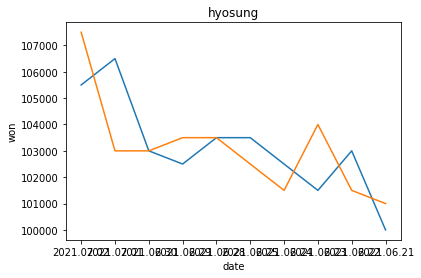

In [26]:
import matplotlib.pyplot as plt

plt.plot(a['날짜'], a['종가'])
plt.plot(a['날짜'], a['시가'])
plt.title('hyosung')
plt.xlabel('date')
plt.ylabel('won')
plt.show()


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
import tkinter as tk

x=np.arange(1, 10, 1)
y=2*x**2
fig = Figure(figsize=(10, 7), dpi=100)  #그리프 그릴 창 생성
fig.add_subplot(1,1,1).plot(x, y)#창에 그래프 하나 추가

window = tk.Tk()  #Tk 객체 생성. 기본 윈도우 객체
canvas = FigureCanvasTkAgg(fig, master=window)
canvas.draw()
canvas.get_tk_widget().pack()
window.mainloop()


In [4]:
data = pd.read_excel('영화순위.xlsx', engine='openpyxl')
data

,순위,영화명,개봉일,예매점유율,예매매출액,누적매출액,예매관객수,누적관객수
0,1,해적: 도깨비 깃발,2022-01-26,0.397,753114740,1422030120,76207,167629
1,2,킹메이커,2022-01-26,0.209,393301560,745621710,40085,90035
2,3,스파이더맨: 노 웨이 홈,2021-12-15,0.064,106135980,72426052500,12240,7231335
3,4,듄,2021-10-20,0.058,185549000,16903293110,11122,1549346
4,5,극장판 안녕 자두야: 제주도의 비밀,2022-01-27,0.043,71087090,53936070,8196,6537
...,...,...,...,...,...,...,...,...
157,148,꾼들의 삽입 법칙,NaT,0.000,5000,0,1,0
158,148,원샷,2022-01-10,0.000,5000,6950000,1,6501
159,148,연주의 섹스파트너,NaT,0.000,5000,0,1,0
160,148,사울 레이터: 인 노 그레이트 허리,2021-12-29,0.000,5000,14332500,1,1600


In [16]:
from selenium import webdriver
import time

chromedriver = 'C:\\Users\\Playdata\\Desktop\\pythonProject2022_01\\jupyter_src\\chromedriver_win32(2)\\chromedriver.exe'
driver = webdriver.Chrome(chromedriver)

driver.get('https://www.kobis.or.kr/kobis/business/stat/boxs/findRealTicketList.do')
driver.find_element_by_xpath('//*[@id="searchForm"]/div/div[4]/button[1]').click()
time.sleep(3)
tbl = driver.find_element_by_css_selector('#content > div.rst_sch > table')
tbody = tbl.find_element_by_tag_name("tbody")
rows = tbody.find_elements_by_tag_name("tr")
for index, value in enumerate(rows):
    tds=value.find_elements_by_tag_name("td")
    print(tds[0].text+'.'+tds[1].text)


<ipython-input-16-f9df54774083>:5: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(chromedriver)
<ipython-input-16-f9df54774083>:8: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_xpath('//*[@id="searchForm"]/div/div[4]/button[1]').click()
<ipython-input-16-f9df54774083>:13: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  tbl = driver.find_element_by_css_selector('#content > div.rst_sch > table')


1.해적: 도깨비 깃발
2.듄
3.나일 강의 죽음
4.극장판 주술회전 0
5.해리 포터와 불사조 기사단
6.킹메이커
7.덩케르크
8.스파이더맨: 노 웨이 홈
9.씽2게더
10.355
11.극장판 안녕 자두야: 제주도의 비밀
12.하우스 오브 구찌
13.비틀즈 겟 백: 루프탑 콘서트
14.만년이 지나도 변하지 않는 게 있어
15.어나더 라운드
16.드라이브 마이 카
17.태일이
18.캐롤
19.타오르는 여인의 초상
20.나의 촛불
21.킹스맨: 퍼스트 에이전트
22.굿 보스
23.웨스트 사이드 스토리
24.데드락: 라스트 리벤지
25.미싱타는 여자들
26.프리! 더 파이널 스트로크 전편
27.특송
28.가슴이 떨리는 건 너 때문
29.펀치 드렁크 러브
30.피그
31.인어가 잠든 집
31.원 세컨드
33.리코리쉬 피자
34.경관의 피
35.프랑스
36.장민호 드라마 최종회
37.도쿄 리벤저스
38.특수본
38.옆집 부부와 구멍 깐부
40.파이어 셧 업 인 마이 본즈
41.블러드써스티
42.섹스웨더
43.프렌치 디스패치
44.더 마더
44.극장판 천재 추리 탐정 셜록홈즈
46.밀라노 두오모 콘서트
47.틱, 틱... 붐!
48.임신한 나무와 도깨비
49.창극 변강쇠 점 찍고 옹녀
50.러브레터
51.바이올렛 에버가든 오케스트라 콘서트 2021
52.불한당: 나쁜 놈들의 세상
53.나쁜 교육
53.브로큰 임브레이스
55.레전더리 콘서트: 레너드 번스타인
55.귀향
57.걸 위드 더 카메라
58.청춘적니
59.피닉스
60.그을린 사랑
61.듣보인간의 생존신고
61.성덕
63.해탄적일천
64.퍼스트 카우
65.오오극장 개관 7주년 특별전 - 대구독립단편신작
66.비브르 사 비
67.스파이의 아내
67.공포분자
67.시카리오: 나이트 오브 이스케이프
67.위기의 여자 하숙생
67.퇴폐의 온상 은밀한 만남
67.스릴 넘치는 그녀의 비밀 섹스
67.그녀의 육체 앞에 무너진 이성
67.짐승남의 거친 사냥법
67.속살 보여준 누나
76.클리포드 더 빅 레드 독
76.크리미널 카